In [3]:
import numpy as np

import pandas as pd
from pandas import Timedelta as td
import matplotlib.pyplot as plt

In [1]:
from utils.audio_to_logits import infer_character_distribution, alphabet, STEP_MS

filepath = 'audio/02-11-30-short.wav'
true_text = "with the progressive dawn the outlines of an immense camp became visible"

logits = infer_character_distribution(filepath)

In [5]:
alph = np.array(list(alphabet._str_to_label.keys()) + ['-'])
timesteps = pd.timedelta_range(start=td(0), periods=logits.shape[0], freq=td(f'{STEP_MS} ms'))
probdist = pd.DataFrame(logits,
                        index=timesteps,
                        columns=alph)
probdist

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,',-
00:00:00,0.000007,0.000027,4.621010e-07,0.000002,6.310609e-07,0.000003,4.852125e-07,0.000003,5.671518e-07,0.000009,...,0.000009,0.000009,0.000010,1.458686e-07,0.000004,1.052257e-07,0.000019,2.561006e-08,5.195279e-07,0.999885
00:00:00.020000,0.000007,0.000005,9.323957e-06,0.000002,2.363375e-06,0.000002,2.164003e-06,0.000007,1.120165e-06,0.000016,...,0.000011,0.000048,0.000007,2.362756e-07,0.000018,9.535923e-08,0.000021,1.413997e-08,3.036690e-07,0.999813
00:00:00.040000,0.000005,0.000006,1.298754e-05,0.000003,2.103514e-06,0.000003,3.529280e-06,0.000004,3.806056e-06,0.000022,...,0.000005,0.000033,0.000008,1.240120e-07,0.000025,1.720524e-08,0.000051,7.355836e-09,2.771724e-07,0.999779
00:00:00.060000,0.000003,0.000016,1.536904e-05,0.000002,1.579160e-06,0.000006,3.284241e-06,0.000001,4.978371e-06,0.000055,...,0.000003,0.000006,0.000007,4.408792e-08,0.000020,9.975881e-09,0.000059,2.312155e-09,3.776414e-07,0.999760
00:00:00.080000,0.000004,0.000026,1.754366e-05,0.000005,3.754077e-06,0.000011,6.132962e-06,0.000002,1.630594e-05,0.000045,...,0.000009,0.000018,0.000023,2.883358e-07,0.000059,1.003231e-07,0.000147,2.678794e-08,5.872891e-07,0.999520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:00:05.660000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.680000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.700000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960
00:00:05.720000,0.057455,0.036645,3.177408e-02,0.033453,2.881138e-02,0.033084,3.251285e-02,0.026948,3.605717e-02,0.034513,...,0.042472,0.046500,0.026331,2.892594e-02,0.032510,2.241859e-02,0.030575,1.741794e-02,1.773833e-02,0.098960


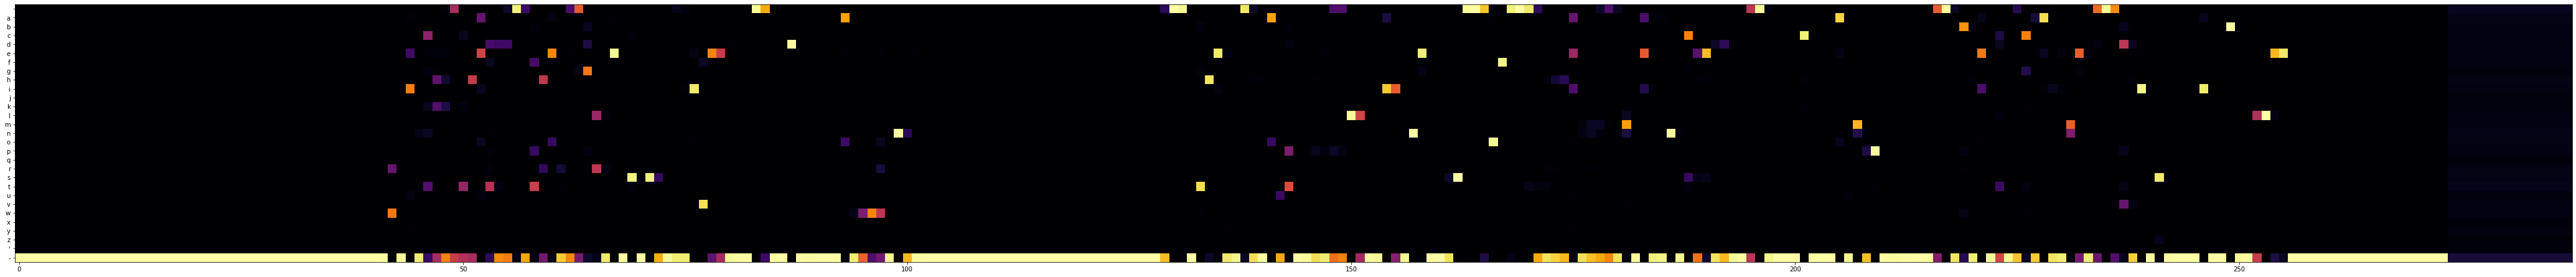

In [6]:
plt.figure(figsize=(len(probdist) / 5, 20))
plt.imshow(logits.T, cmap='inferno')
plt.yticks(np.arange(len(alph)), alph)
plt.tight_layout()
plt.show()

In [6]:
# Top three characters for every moment
top_chars = logits.argsort(axis=1)[:, ::-1]
top_n_chars = 3

np.hstack([
    alph[top_chars][:, :top_n_chars],
    logits[np.repeat([np.arange(top_chars.shape[0])], top_n_chars, axis=0).T, top_chars[:, :top_n_chars]].round(2)
])

array([['-', 'a', 'y', '1.0', '0.0', '0.0'],
       ['-', 't', 'y', '1.0', '0.0', '0.0'],
       ['-', 'y', 't', '1.0', '0.0', '0.0'],
       ...,
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05'],
       ['-', ' ', 't', '0.1', '0.06', '0.05']], dtype='<U32')

In [7]:
from CTCDecoder.ctc_decoder import beam_search

mat = logits[:105, :]  # the progressive dawn
transcript = 'the progressive dawn'

chars = ''.join(alph[:-1])  # requires a string (without blank)

print(f"""Beam search: "{beam_search(mat, chars)}\"""")

Beam search: "wichet the gressive dawn"


In [8]:
from importlib import reload
from utils import decoder_v1

reload(decoder_v1)  # For PyCharm debugger to apply changes to the file
from utils.decoder_v1 import infer_transcript_timing, Path

mat = logits[:105, :]  # the progressive dawn
transcript = 'progressive dawn'

chars = ''.join(alph[:-1])  # requires a string (without blank)
# alph = np.array(list(chars + '-'))

paths = infer_transcript_timing(mat, chars, beam_width=50, transcript=transcript)
# paths = infer_transcript_timing(logits, chars, beam_width=30, transcript=true_text)
print(Path.get_top_paths(paths, top_n=1)[0])

best_path = Path.get_top_paths(paths, top_n=1)[0]
np.array(list(zip(best_path.path, np.array(list(transcript))[list(best_path.path)], best_path.time)))

Path(score=82.99353, path=iee  daaawwn)


array([['8', 'i', '44'],
       ['10', 'e', '46'],
       ['10', 'e', '52'],
       ['11', ' ', '56'],
       ['11', ' ', '63'],
       ['12', 'd', '64'],
       ['13', 'a', '67'],
       ['13', 'a', '76'],
       ['13', 'a', '93'],
       ['14', 'w', '96'],
       ['14', 'w', '97'],
       ['15', 'n', '99']], dtype='<U11')

In [54]:
probs = logits[:105, :]  # the progressive dawn
transcript = 'with the progressive dawn'


words = transcript.split(' ')
trpt_ind_map = pd.Series(np.arange(len(alph)), index=alph)

word = words[2]
trpt_inds = trpt_ind_map[list(word)].values
p_fit = probs[:, trpt_inds]

mapping = pd.DataFrame(p_fit, columns=list(word))
p_fit[-1, :]
# mapping

array([1.17952389e-07, 7.43359760e-06, 2.73427668e-06, 2.97075894e-06,
       7.43359760e-06, 1.08798842e-04, 1.81758427e-04, 1.81758427e-04,
       1.77102390e-06, 4.55636879e-08, 1.08798842e-04])